In [1]:
import numpy             as np
import matplotlib.pyplot as plt

from henri.grhd import GRHD, EOS_polytrope

# Define polytropic equation of state
eos = EOS_polytrope(
    polytropic_index = 1.0,
    rho_min          = 1.0e-9,
)

# Define grhd object
grhd = GRHD(eos=eos)

# Define radial grid
N = 256
r = np.logspace(-2, +2, N)


# Define metric solver
def solve_metric(tilde_E, tilde_S_r, tilde_S):
    """
    Metric solver, in this case always flat, i.e. Minkowski.
    """
    alpha  = np.ones (N)
    beta_r = np.zeros(N)
    psi    = np.ones (N)

    A_rr   = np.zeros(N)

    return alpha, beta_r, psi, A_rr


# Define metric solver
grhd.solve_metric = solve_metric

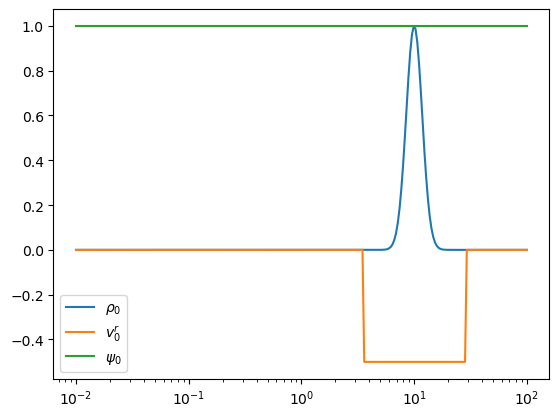

In [2]:
rho_0 = np.exp(-((np.log10(r)-1)/0.1)**2)
rho_0[rho_0 < eos.rho_min] = eos.rho_min
v_r_0 = -0.5 * np.ones_like(r)
psi_0 = np.ones_like(r)

v_r_0[rho_0 == eos.rho_min] = 0.0


plt.plot(r, rho_0, label=r'$\rho_0$')
plt.plot(r, v_r_0, label=r'$v^{r}_{0}$')
plt.plot(r, psi_0, label=r'$\psi_0$')
plt.xscale('log')
# plt.yscale('log')
plt.legend()

In [3]:
t_evol = 1.0e-1

grhd.evolve(r=r, rho_0=rho_0, v_r_0=v_r_0, psi_0=psi_0, t_evol=t_evol)

/Users/frederikd/Documents/Frederik/henri/src/henri/grhd/cons2prim.py:102: RuntimeWarning: invalid value encountered in sqrt
  w = 1.0 / np.sqrt(1.0 - v_r**2)


ValueError: array must not contain infs or NaNs

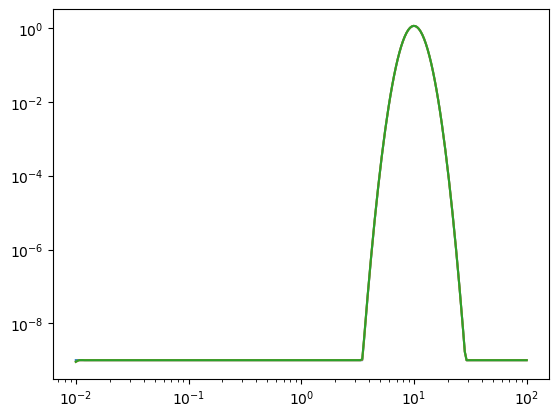

In [4]:
plt.plot(r, grhd.tilde_D)
plt.xscale('log')
plt.yscale('log')

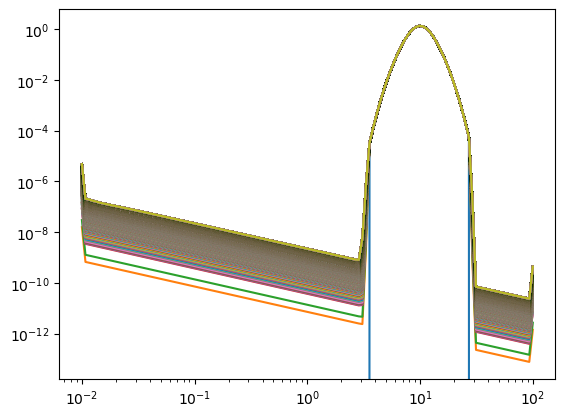

In [5]:
plt.plot(r, np.abs(grhd.tilde_S_r))
plt.xscale('log')
plt.yscale('log')

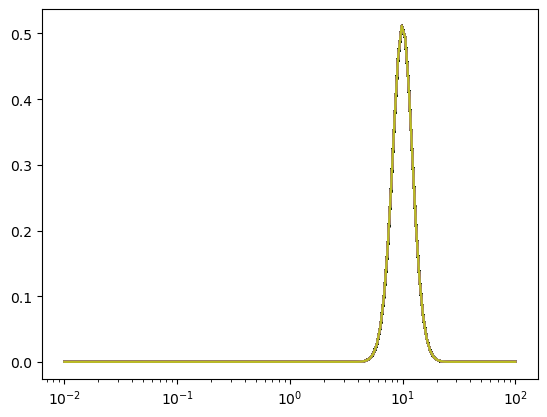

In [6]:
plt.plot(r, grhd.tilde_tau)
plt.xscale('log')